In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

sns.set_style("darkgrid")

In [6]:
cat = application.select_dtypes(include='object').columns
num = application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<20):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

In [5]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,"270,000.000","1,293,502.500","35,698.500","1,129,500.000",Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,"-1,186.000",-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.000","135,000.000","6,750.000","135,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,"-4,260.000",-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

### Organization Type with Occupation Type defaulters for whole Dataset

### Organization Type with Occupation Type Defaulter rates

In [8]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.unstack().drop([('SK_ID_CURR',0),('Defaulter_rates',0)],axis=1).stack().droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Defaulter_rates',ascending=False)
a_top = a[a['Totalcount']>16]
# a_top = a_top.drop(['Secretaries','Waiters/barmen staff','Private service staff','Realty agents','HR staff'],level=1)
a_top = a_top[:15]
a_top

,,Totalcount,Defaulter_rates
ORGANIZATION_TYPE,OCCUPATION_TYPE,,
Construction,Low-skill Laborers,71,26.761
Industry: type 1,Security staff,22,22.727
Housing,Low-skill Laborers,23,21.739
Transport: type 4,Low-skill Laborers,23,21.739
Trade: type 7,Low-skill Laborers,74,20.270
Government,Low-skill Laborers,51,19.608
Self-employed,Low-skill Laborers,419,19.332
Transport: type 3,Laborers,42,19.048
Hotel,Cleaning staff,27,18.519


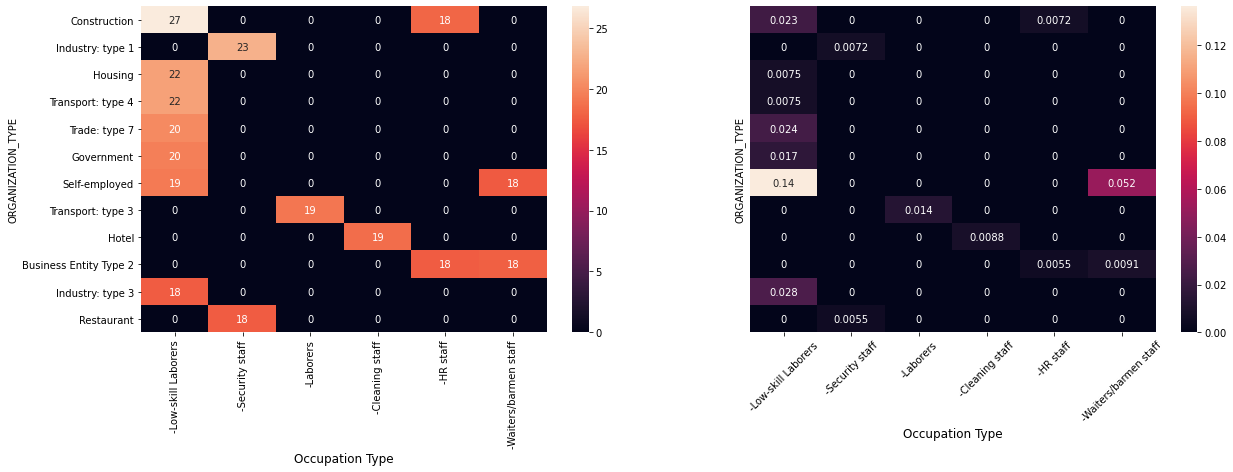

In [18]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(a_top.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0),annot=True,ax=ax[0])
sns.heatmap((a_top.drop('Defaulter_rates',axis=1).rename(columns={'Totalcount':''})/len(application)*100)
            .unstack().fillna(0),annot=True,ax=ax[1])
# ax[0].tick_params(left=False, bottom=False)
ax[1].set_yticks([])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
ax[0].set_xlabel('Occupation Type',size=12)
ax[1].set_xlabel('Occupation Type',size=12)
plt.show()
#+theme(axis.text.y = element_blank())

There are high number of __Self Employed Low skilled Laborers__ at 0.14% of the total clients and also have a high defaulter rate at 19%

### Organization Type with Occupation Type Defaulter rates for client types with low defaulter rates

In [95]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Defaulter_rates')
# a_low = a[a['Totalcount']>15]
a_low = a_low[:10]
a_low

,,Totalcount,Defaulter_rates
ORGANIZATION_TYPE,OCCUPATION_TYPE,,
Industry: type 9,Core staff,85,1.176
Kindergarten,High skill tech staff,81,1.235
Industry: type 11,Accountants,78,1.282
Transport: type 2,Managers,73,1.370
Trade: type 6,Managers,73,1.370
University,Core staff,276,1.449
Electricity,Managers,59,1.695
University,Accountants,59,1.695
Emergency,High skill tech staff,57,1.754


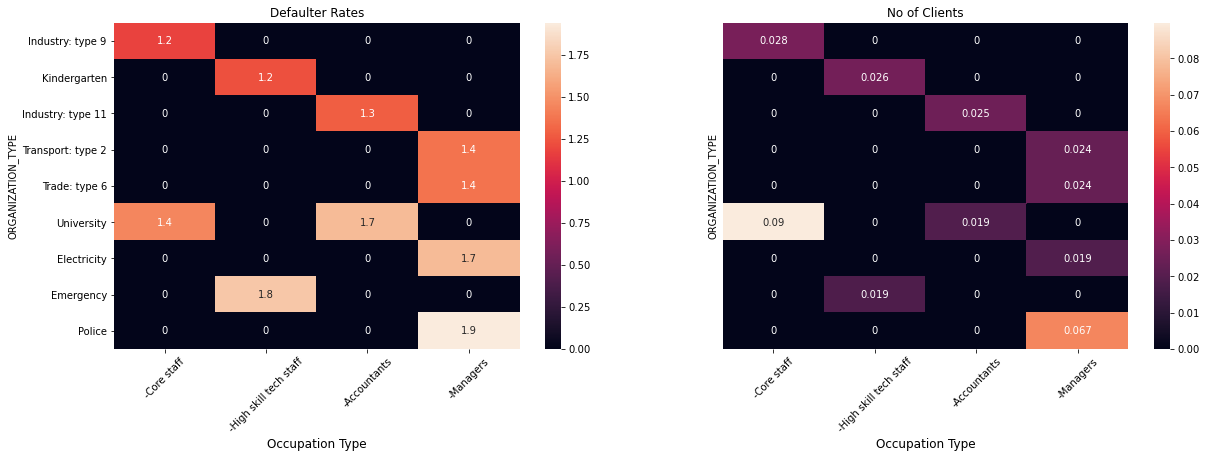

In [96]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(a_low.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0),annot=True,ax=ax[0])
plt.sca(ax[0])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=12)
plt.title('Defaulter Rates')


sns.heatmap((a_low.drop('Defaulter_rates',axis=1).rename(columns={'Totalcount':''})/len(application)*100)
            .unstack().fillna(0),annot=True,ax=ax[1])
ax[1].set_yticks([])
plt.sca(ax[1])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=12)
plt.title('No of Clients')
plt.show()
#+theme(axis.text.y = element_blank())

### Organization Type with Occupation Type Defaulter rates for Client types of highest frequeny

In [82]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Totalcount',ascending=False)
a_low = a[a['Totalcount']>15]
# a_low = a_low.drop(['Secretaries','Waiters/barmen staff','Private service staff','Realty agents','HR staff'],level=1)
a_low = a_low[:18]
a_low

Totalcount  Defaulter_rates
ORGANIZATION_TYPE      OCCUPATION_TYPE                                   
Business Entity Type 3 Laborers                    17484           11.050
Self-employed          Sales staff                 13189            9.531
Business Entity Type 3 Sales staff                  8853            9.624
                       Managers                     7138            6.977
Self-employed          Laborers                     6298           11.972
Medicine               Medicine staff               5937            6.956
Business Entity Type 3 Drivers                      5475           11.507
Business Entity Type 2 Laborers                     4429            9.754
Self-employed          Drivers                      4179           13.496
School                 Core staff                   4171            4.196
Kindergarten           Core staff                   4054            6.734
Trade: type 7          Sales staff                  4052            9.970
Construction           Laborers                     3367           14.078
Self-employed          Managers                     3270            7.859
Business Entity Type 3 Accountants                  3249            4.401
                       High skill tech staff        3153            6.343
Other                  Laborers                     3016           10.411
Self-employed          Core staff                   2638            7.847

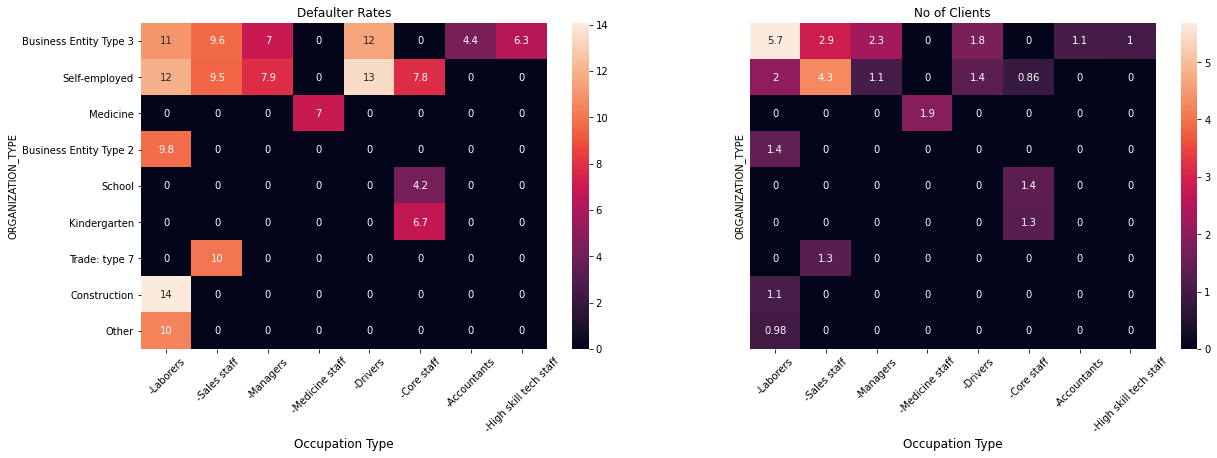

In [84]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(a_low.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0),annot=True,ax=ax[0])
plt.sca(ax[0])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=12)
plt.title('Defaulter Rates')


sns.heatmap((a_low.drop('Defaulter_rates',axis=1).rename(columns={'Totalcount':''})/len(application)*100)
            .unstack().fillna(0),annot=True,ax=ax[1])
ax[1].set_yticks([])
plt.sca(ax[1])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=12)
plt.title('No of Clients')
plt.show()
#+theme(axis.text.y = element_blank())

- __5.7%__ of our Clients are __Laborers__ from __Business Entity type 3__ and they have __11%__ defaulter rates.
- Followed by __Sales Staff__ who are __Self Employed__ or are from __Business Entity type 3__ who are also in higher numbers __(4.3% and 2.9%)__ and also have a high defaulter rate at __9.5%__ and __9.6%__ respectively.

,NAME_CONTRACT_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Cash loans,90.479,1,8.346
1,Revolving loans,9.521,1,5.478


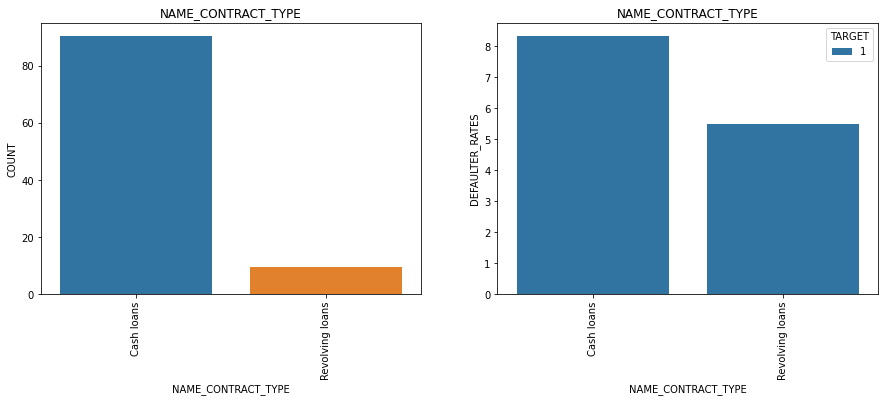

,CODE_GENDER,COUNT,TARGET,DEFAULTER_RATES
0,F,65.834,1,6.999
1,M,34.164,1,10.142


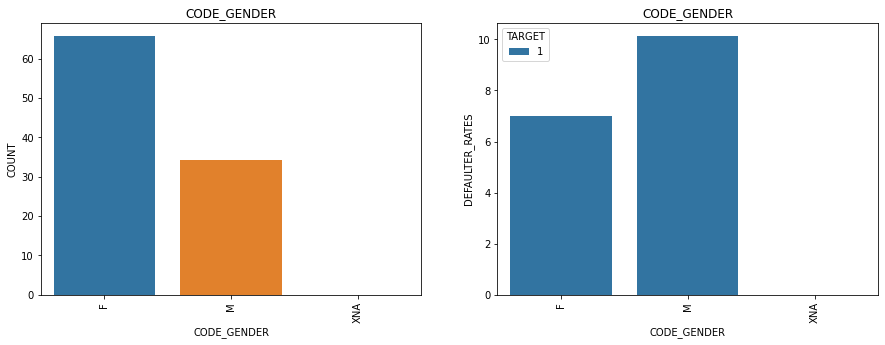

,FLAG_OWN_CAR,COUNT,TARGET,DEFAULTER_RATES
0,N,65.989,1,8.500
1,Y,34.011,1,7.244


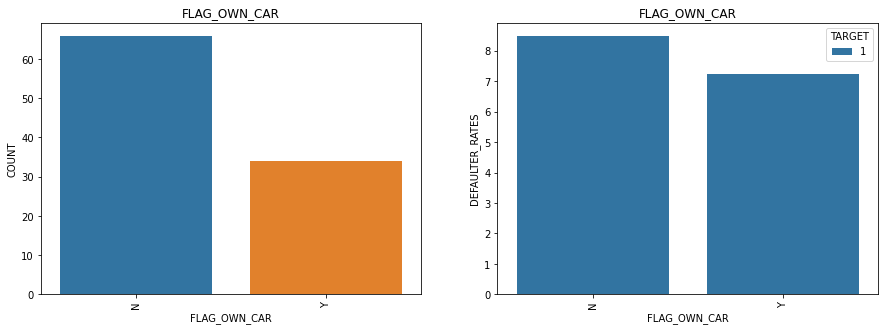

,FLAG_OWN_REALTY,COUNT,TARGET,DEFAULTER_RATES
0,Y,69.367,1,7.962
1,N,30.633,1,8.325


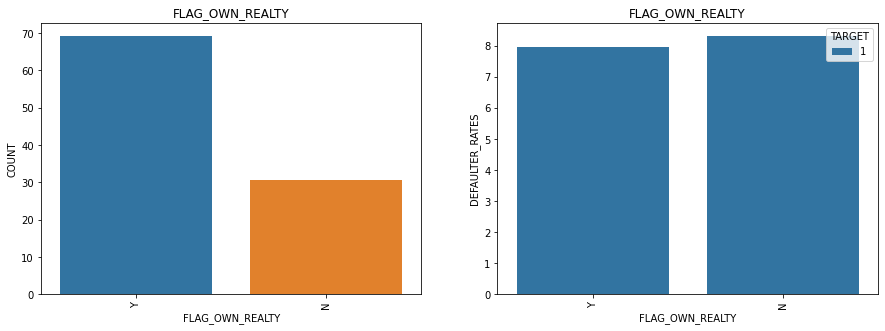

,CNT_CHILDREN,COUNT,TARGET,DEFAULTER_RATES
0,0,70.037,1,7.712
1,1,19.875,1,8.924
2,2,8.699,1,8.722
3,3,1.209,1,9.631
4,4,0.140,1,12.821
5,5,0.027,1,8.333
6,6,0.007,1,28.571
7,9,0.001,1,100.000
8,11,0.000,1,100.000


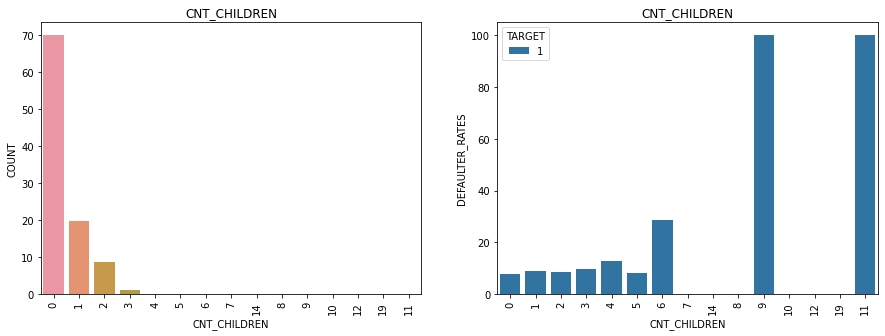

,NAME_TYPE_SUITE,COUNT,TARGET,DEFAULTER_RATES
0,Unaccompanied,80.819,1,8.183
1,Family,13.056,1,7.495
2,"Spouse, partner",3.697,1,7.872
3,Children,1.062,1,7.377
4,Other_B,0.576,1,9.831
5,Other_A,0.282,1,8.776
6,Group of people,0.088,1,8.487


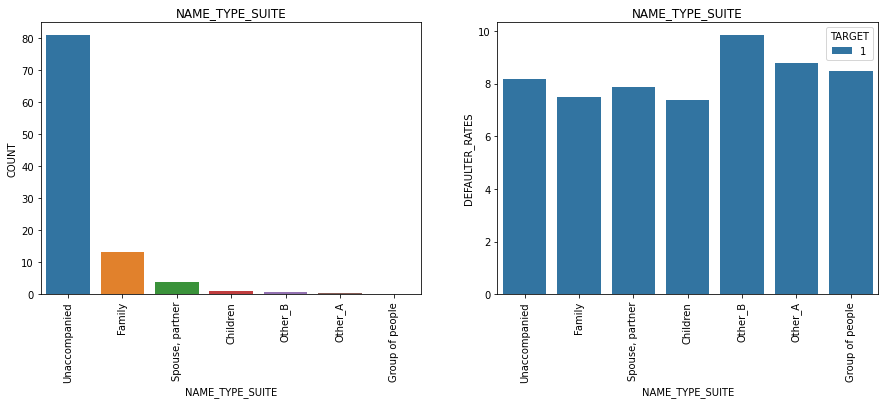

,NAME_INCOME_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Working,51.632,1,9.588
1,Commercial associate,23.289,1,7.484
2,Pensioner,18.003,1,5.386
3,State servant,7.058,1,5.755
4,Unemployed,0.007,1,36.364
5,Maternity leave,0.002,1,40.000


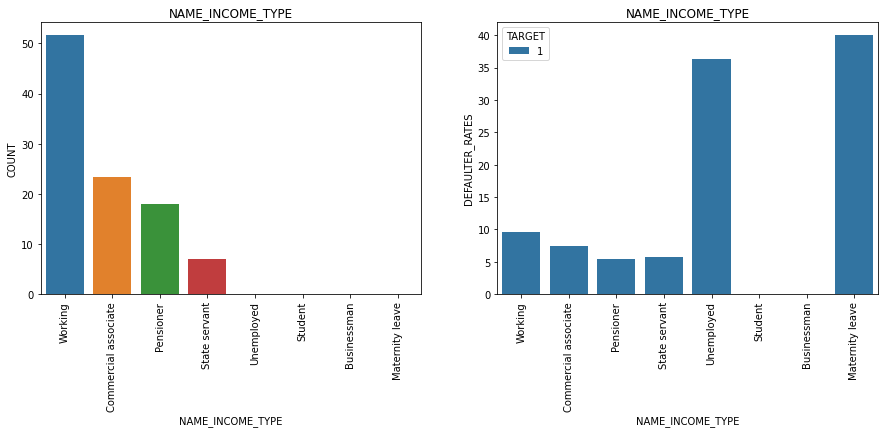

,NAME_EDUCATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Secondary / secondary special,71.019,1,8.940
1,Higher education,24.345,1,5.355
2,Incomplete higher,3.342,1,8.485
3,Lower secondary,1.241,1,10.928
4,Academic degree,0.053,1,1.829


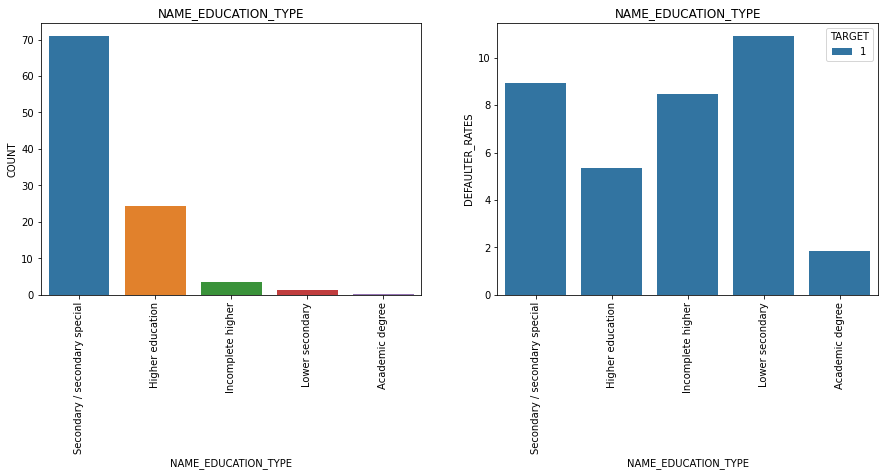

,NAME_FAMILY_STATUS,COUNT,TARGET,DEFAULTER_RATES
0,Married,63.878,1,7.560
1,Single / not married,14.778,1,9.808
2,Civil marriage,9.683,1,9.945
3,Separated,6.429,1,8.194
4,Widow,5.232,1,5.824


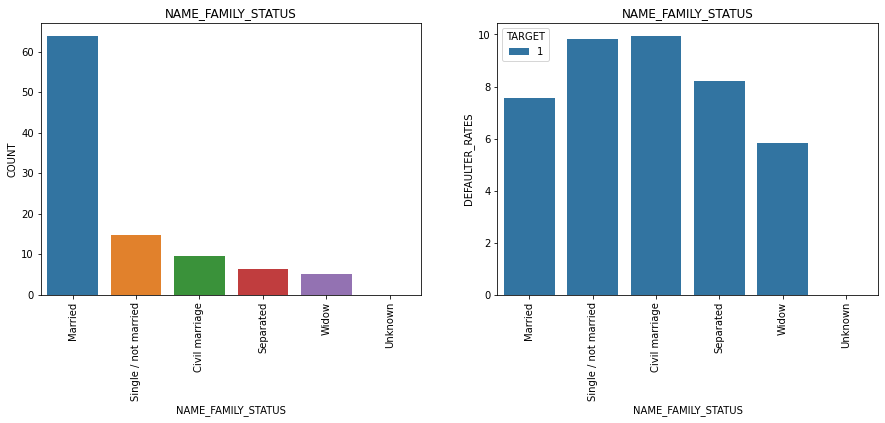

,NAME_HOUSING_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,House / apartment,88.734,1,7.796
1,With parents,4.826,1,11.698
2,Municipal apartment,3.637,1,8.540
3,Rented apartment,1.587,1,12.313
4,Office apartment,0.851,1,6.572
5,Co-op apartment,0.365,1,7.932


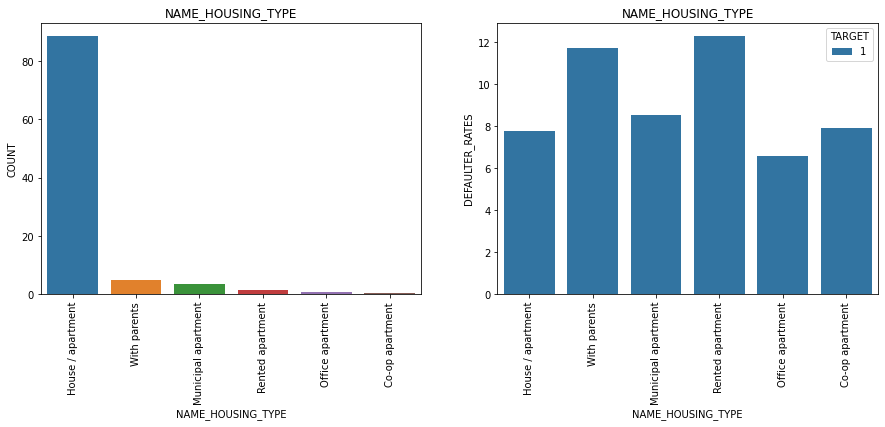

,FLAG_MOBIL,COUNT,TARGET,DEFAULTER_RATES
0,1,100.000,1,8.073


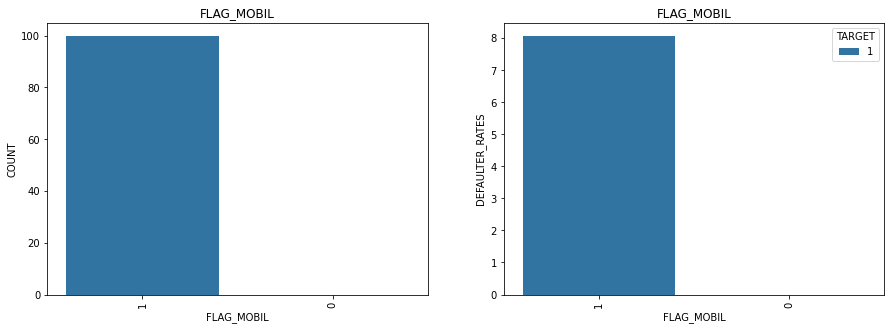

,FLAG_EMP_PHONE,COUNT,TARGET,DEFAULTER_RATES
0,1,81.989,1,8.660
1,0,18.011,1,5.400


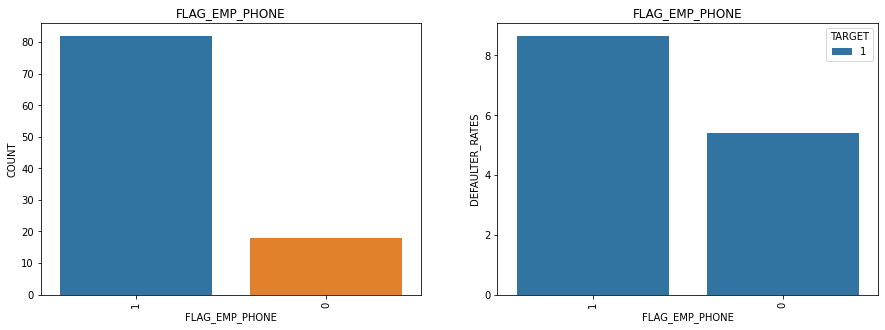

,FLAG_WORK_PHONE,COUNT,TARGET,DEFAULTER_RATES
0,0,80.063,1,7.685
1,1,19.937,1,9.630


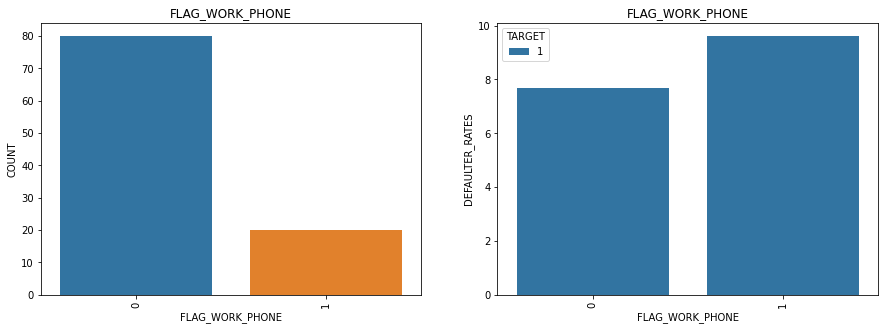

,FLAG_CONT_MOBILE,COUNT,TARGET,DEFAULTER_RATES
0,1,99.813,1,8.073
1,0,0.187,1,7.840


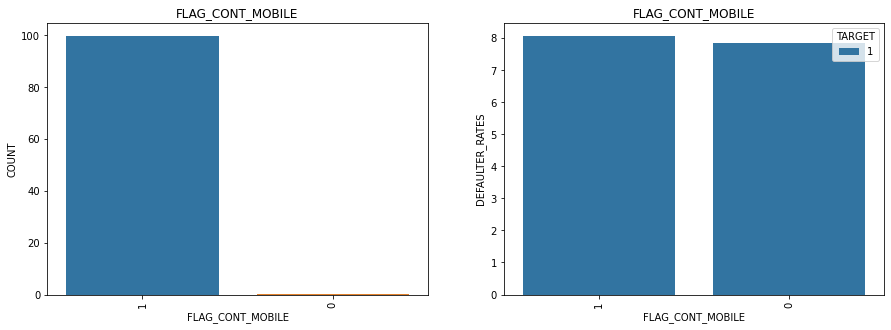

,FLAG_PHONE,COUNT,TARGET,DEFAULTER_RATES
0,0,71.893,1,8.478
1,1,28.107,1,7.036


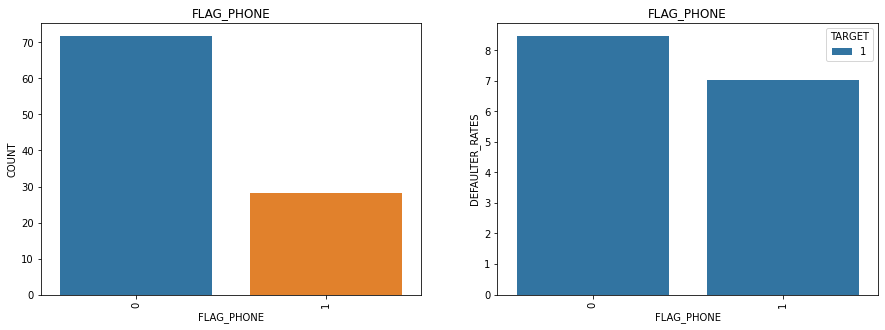

,FLAG_EMAIL,COUNT,TARGET,DEFAULTER_RATES
0,0,94.328,1,8.085
1,1,5.672,1,7.878


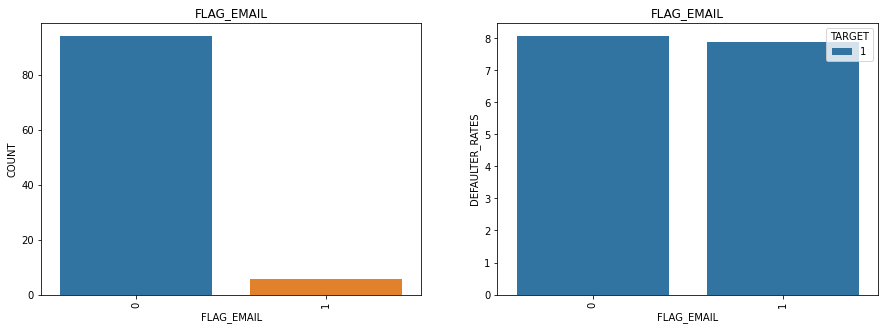

,OCCUPATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Laborers,17.946,1,10.579
1,Sales staff,10.439,1,9.632
2,Core staff,8.966,1,6.304
3,Managers,6.950,1,6.214
4,Drivers,6.050,1,11.326
5,High skill tech staff,3.701,1,6.160
6,Accountants,3.191,1,4.830
7,Medicine staff,2.776,1,6.700
8,Security staff,2.186,1,10.742
9,Cooking staff,1.934,1,10.444


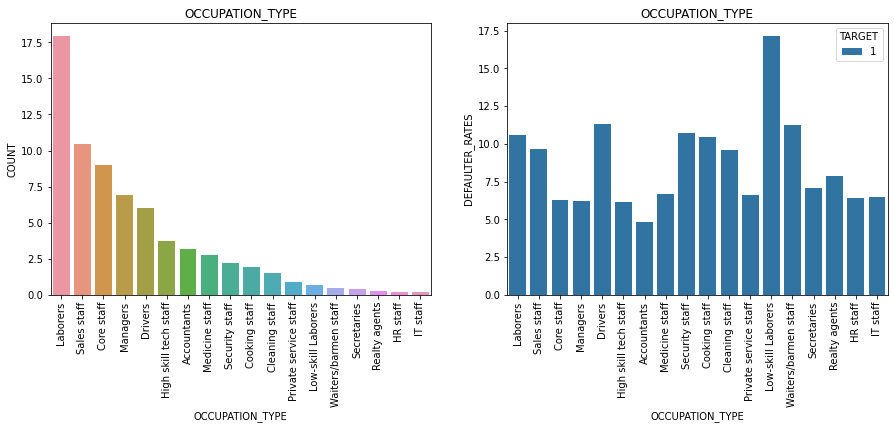

,CNT_FAM_MEMBERS,COUNT,TARGET,DEFAULTER_RATES
0,2.000,51.496,1,7.583
1,1.000,22.063,1,8.364
2,3.000,17.105,1,8.760
3,4.000,8.031,1,8.649
4,5.000,1.131,1,9.402
5,6.000,0.133,1,13.480
6,7.000,0.026,1,7.407
7,8.000,0.007,1,30.000
8,10.000,0.001,1,33.333
9,11.000,0.000,1,100.000


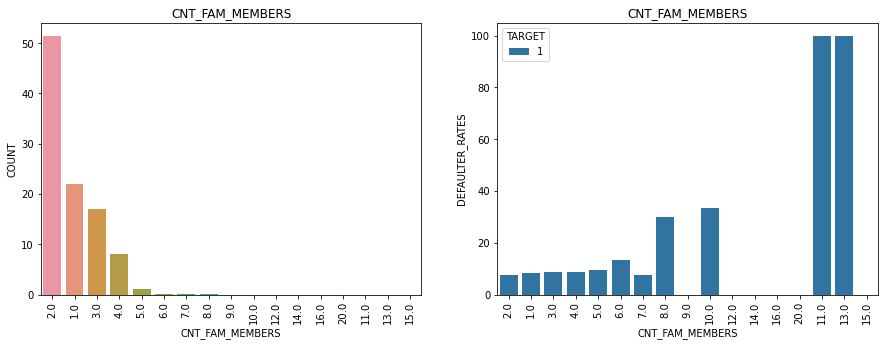

,REGION_RATING_CLIENT,COUNT,TARGET,DEFAULTER_RATES
0,2,73.813,1,7.889
1,3,15.717,1,11.103
2,1,10.470,1,4.820


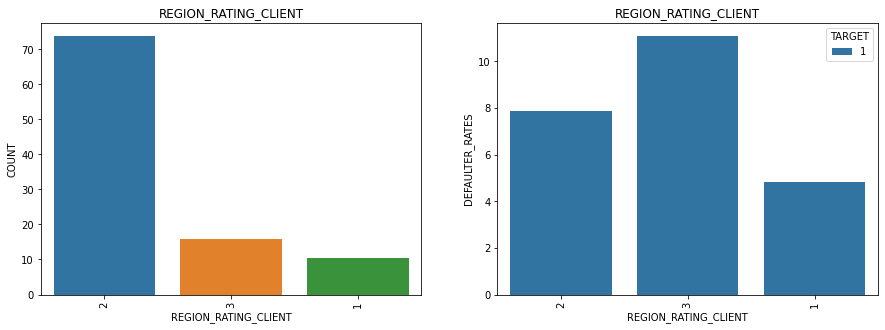

,REGION_RATING_CLIENT_W_CITY,COUNT,TARGET,DEFAULTER_RATES
0,2,74.626,1,7.918
1,3,14.263,1,11.402
2,1,11.111,1,4.841


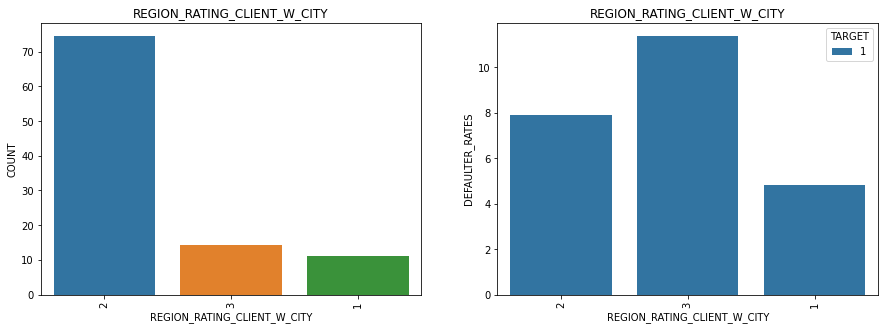

,WEEKDAY_APPR_PROCESS_START,COUNT,TARGET,DEFAULTER_RATES
0,TUESDAY,17.528,1,8.350
1,WEDNESDAY,16.889,1,8.160
2,MONDAY,16.492,1,7.757
3,THURSDAY,16.452,1,8.100
4,FRIDAY,16.369,1,8.147
5,SATURDAY,11.008,1,7.887
6,SUNDAY,5.262,1,7.929


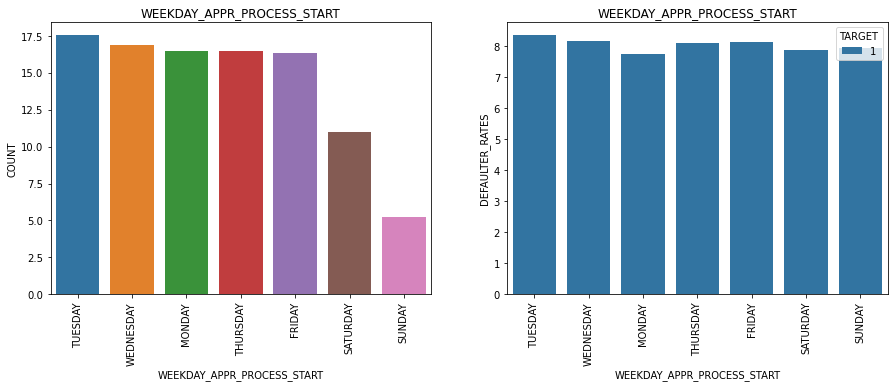

,REG_REGION_NOT_LIVE_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,98.486,1,8.054
1,1,1.514,1,9.298


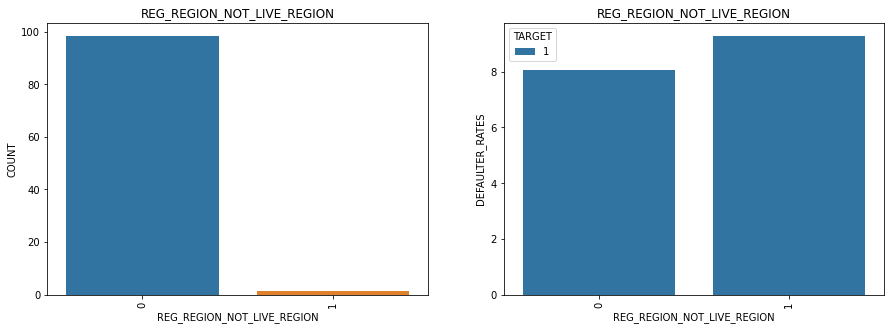

,REG_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,94.923,1,8.029
1,1,5.077,1,8.891


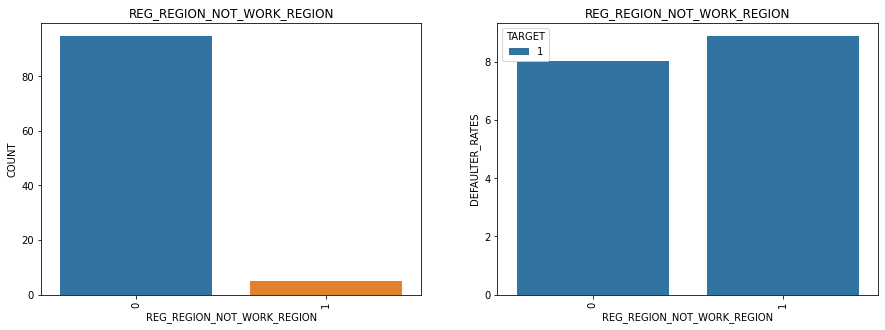

,LIVE_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,95.934,1,8.057
1,1,4.066,1,8.446


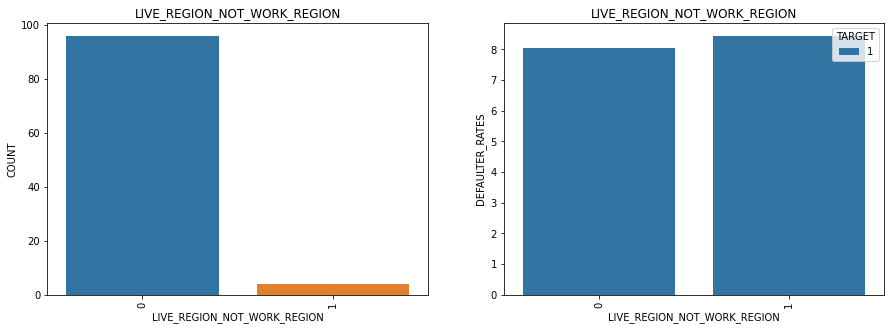

,REG_CITY_NOT_LIVE_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,92.183,1,7.721
1,1,7.817,1,12.226


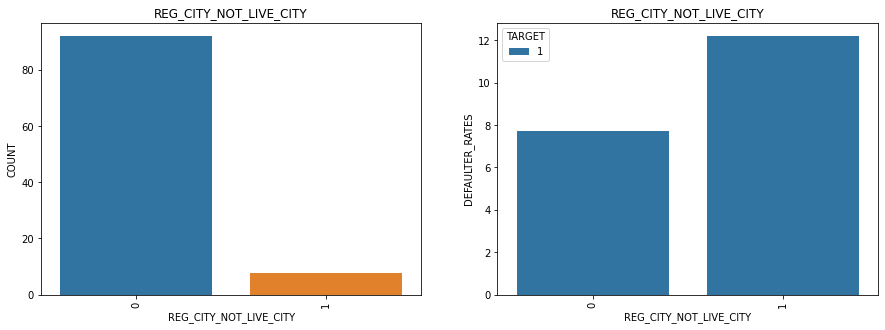

,REG_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,76.955,1,7.313
1,1,23.045,1,10.611


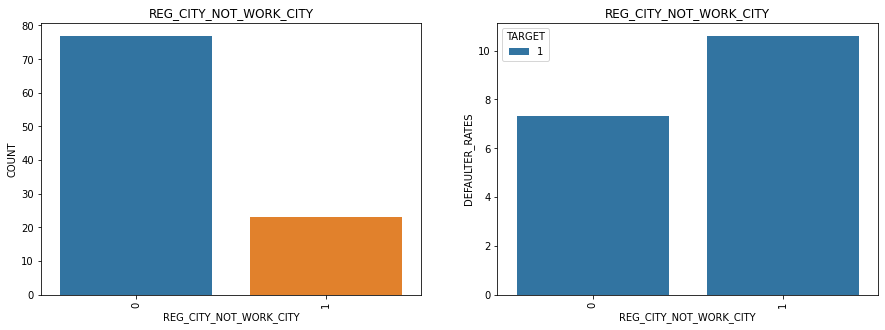

,LIVE_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,82.045,1,7.658
1,1,17.955,1,9.966


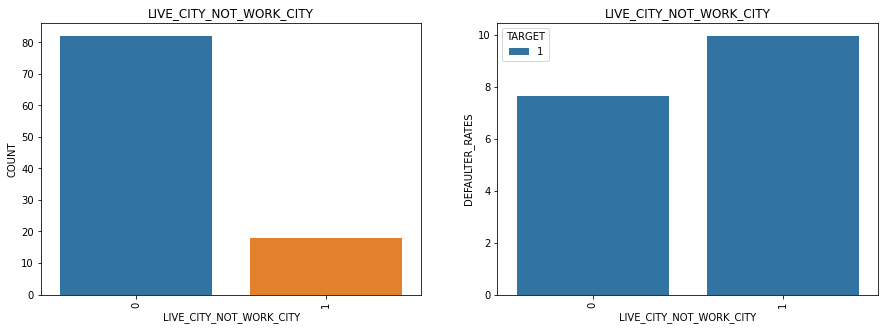

ValueError: Could not interpret input 'ORGANIZATION_TYPE'

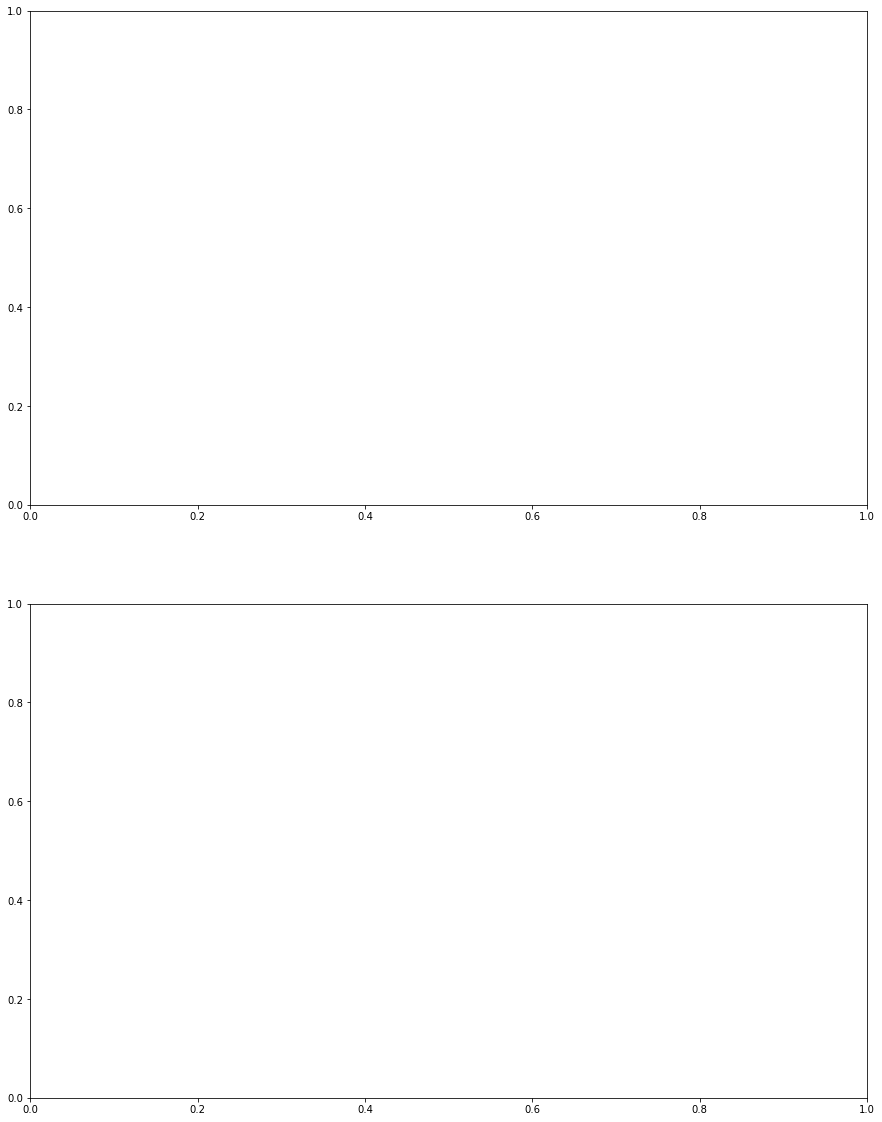

In [7]:
for col in cat.drop('TARGET'):
    a = application.groupby([col]).count()[['SK_ID_CURR']].sort_values(['SK_ID_CURR'],ascending=False)
    a = a.rename(columns={'SK_ID_CURR':'COUNT'})
    a_target = application.groupby([col,"TARGET"]).count()[['SK_ID_CURR']]
    a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
    a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
    if(len(a)>25):
        a.reset_index(inplace=True)
        fig,ax = plt.subplots(2,1,figsize=(15,20))
    else:
        defaulter_rates = a.merge(a_target,on=col)
        defaulter_rates['COUNT'] = defaulter_rates['COUNT']/len(application)*100
        display(defaulter_rates)
        a.reset_index(inplace=True)
#         a['COUNT'] = a['COUNT']/len(application)*100
        fig,ax = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x=col,y="COUNT",data=defaulter_rates,order=a[col],ax=ax[0])
    sns.barplot(x=col,y="DEFAULTER_RATES",hue="TARGET",data=a_target,order=a[col],ax=ax[1])
#     plt.title(col)
    ax[0].set_title(col)
    ax[1].set_title(col)
    ax[0].tick_params(axis='x',rotation=90)
    ax[1].tick_params(axis='x',rotation=90)
    plt.show()

In [ ]:
col = ""

a = application.groupby([col]).count()[['SK_ID_CURR']].sort_values(['SK_ID_CURR'],ascending=False)
a = a.rename(columns={'SK_ID_CURR':'COUNT'})
a_target = application.groupby([col,"TARGET"]).count()[['SK_ID_CURR']]
a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
if(len(a)>25):
    a.reset_index(inplace=True)
    fig,ax = plt.subplots(2,1,figsize=(15,20))
else:
    defaulter_rates = a.merge(a_target,on=col)
    defaulter_rates['COUNT'] = defaulter_rates['COUNT']/len(application)*100
    display(defaulter_rates)
    a.reset_index(inplace=True)
    fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=col,y="COUNT",data=defaulter_rates,order=a[col],ax=ax[0])
sns.barplot(x=col,y="DEFAULTER_RATES",hue="TARGET",data=a_target,order=a[col],ax=ax[1])
#     plt.title(col)
ax[0].set_title(col)
ax[1].set_title(col)
ax[0].tick_params(axis='x',rotation=90)
ax[1].tick_params(axis='x',rotation=90)
plt.show()

### Education Type w.r.t Income Type

In [35]:
a = application.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['TotalCount'] = a_level1['SK_ID_CURR']
a['Defaulter_rates'] = a_default['SK_ID_CURR']
a.drop(['SK_ID_CURR'],axis=1,inplace=True)
# a = a.rename(columns={'SK_ID_CURR':'COUNTwrtTarget'})
a = a.unstack().drop([('Defaulter_rates', 0),('TotalCount', 0)],axis=1).fillna(0).stack()
a = a.reset_index(level=-1).drop('TARGET',axis=1)
a['Proportions'] = a['TotalCount']/len(application)*100
education_type = a.reset_index()
education_type = education_type.drop(23).reset_index(drop=True)

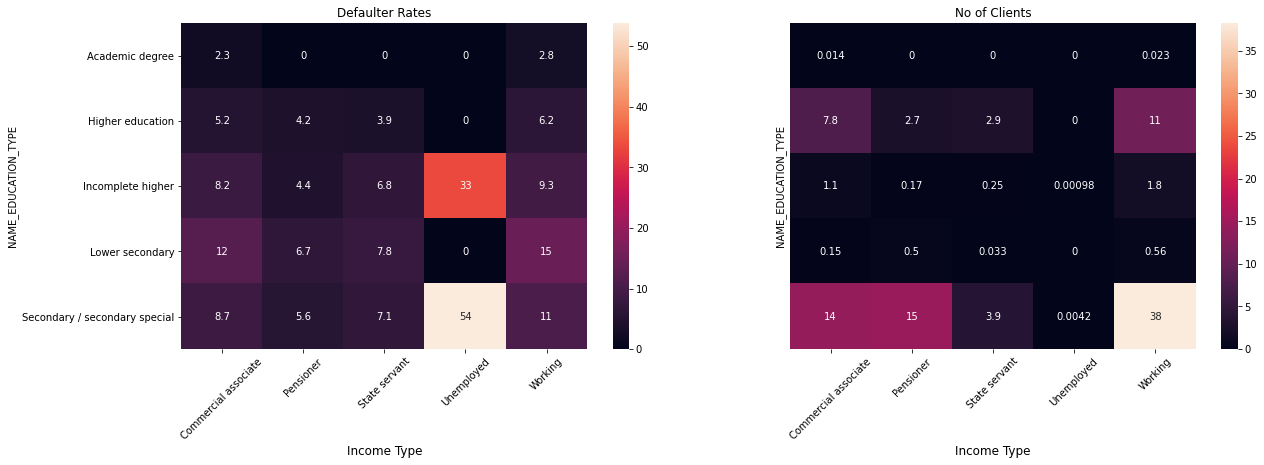

In [81]:
fig,ax = plt.subplots(1,2,figsize=(20,6))


sns.heatmap(a['Defaulter_rates'].unstack().fillna(0).drop(['Maternity leave','Businessman','Student'],axis=1),annot=True,ax=ax[0])
plt.sca(ax[0])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Income Type',size=12)
plt.title('Defaulter Rates')


sns.heatmap(a['Proportions'].unstack().fillna(0).drop(['Maternity leave','Businessman','Student'],axis=1),annot=True,ax=ax[1])
plt.sca(ax[1])
ax[1].set_yticks([])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Income Type',size=12)
plt.title('No of Clients')
plt.show()

Color heatmaps with other heatmap color scheme